# Tugas 1 | Hitung Jarak Antar Data

### Konsep Dasar

Penghitungan jarak antar data nantinya akan digunakan untuk memprediksi suatu data termasuk ke dalam kelas apa. 

Penghitungan ini disebut sebagai algoritma K-NN (*K-Nearest Neighbors*) dimana menggunakan perhitungan jarak terdekat dari suatu data. Jadi, objek ini akan mencari objek terdekat dengan objek baru yang baru saja diinput. Dalam ini memperhatikan kemiripan antardata.


### Macam-macam Rumus Penghitungan Jarak Terdekat



1. *Euclidean Distance*
$$ d(x, y) = \sqrt{\sum_{i=1}^m(x_i-y_i)^2} $$


> Keterangan:
- *d(x,y)* dibaca *distance* antara x dan y.




2. *Manhattan Distance*

$$ d(x,y) = \sum_{i=1}^m|x_i - y_i| $$

> Rumus ini digunakan untuk mecari jarak dengan hanya menjumlahkan seluruh selisih jarak pada $ x_i $ dan $ y_i $ tanpa menggunakan konsep pythagoras (menghitung jarak antara 2 titik).

3. *Minkowsky Distance*
$$ d(x,y) = (\sum_{i=1}^m|X_i - y_i|^r)^{1/r} $$

> Rumus ini beradasarkan konsep aljabar berupa vektor yang memiliki n. Akan tetapi, r tidak bernilai 1 maupun 2. Hal ini dikarenakan jika $r = 1$ akan menjadi rumus *Manhattan Distance* dan $r = 2$ akan menjadi rumus *Euclidean Distance*.

4. *Chebychev Distance*
$$ d(x,y) = \max_{i=1}^n|x_i - y_i| $$

> Merupakan algoritma yang sangat sederhana dari semua algoritma *machine learning*. Dimana rumus ini menghitung jarak terbesar antara $x_i$ dan $y_i$.

### Implementasi pada Kode Python

In [48]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

Mengambil data yang ada pada dataset csv

In [49]:
Data_BanjirJakarta = pd.read_csv("https://raw.githubusercontent.com/astnrhy30/datamining/main/Data_BencanaBanjir_Jakarta_Desember2017.csv")

Menampilkan data banjir 5 baris teratas.

In [50]:
Data_BanjirJakarta.head()

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Barat,KALIDERES,KAMAL,"01, 04",2,6,0,0,20 s/d 30 cm,"tgl. 03, 04, 06, 20",0,0,0,0,0,0,0,0
1,Jakarta Barat,GROGOL PETAMBURAN,JELAMBAR BARU,"01,06, 07",3,2,0,0,10 s/d 20 cm,"tgl. 05, 06, 07, 09",0,0,0,0,0,0,0,0
2,Jakarta Selatan,PASAR MINGGU,JATI PADANG,6,1,1,8,35,5 - 50 cm,"tgl. 01, 11, 16, 20",0,0,0,0,35,1,0,0
3,Jakarta Selatan,PANCORAN,KALIBATA,"05, 09, 10",3,3,0,0,20 s/d 30 cm,tgl. 12,0,0,0,0,0,0,0,0
4,Jakarta Selatan,SETIABUDI,KUNINGAN TIMUR,5,1,1,0,0,20 s/d 25 cm,tgl. 12,0,0,0,0,0,0,0,0


Mengetahui total jumlah baris dan kolom pada tabel tersebut.

In [51]:
Data_BanjirJakarta.shape

(26, 18)

Menampilkan data yang kolomnya bertipe data nominal.

In [52]:
Data_BanjirJakarta[["kota_administrasi","kecamatan","kelurahan","rw","ketinggian_air","tanggal_kejadian"]].head()

,kota_administrasi,kecamatan,kelurahan,rw,ketinggian_air,tanggal_kejadian
0,Jakarta Barat,KALIDERES,KAMAL,"01, 04",20 s/d 30 cm,"tgl. 03, 04, 06, 20"
1,Jakarta Barat,GROGOL PETAMBURAN,JELAMBAR BARU,"01,06, 07",10 s/d 20 cm,"tgl. 05, 06, 07, 09"
2,Jakarta Selatan,PASAR MINGGU,JATI PADANG,6,5 - 50 cm,"tgl. 01, 11, 16, 20"
3,Jakarta Selatan,PANCORAN,KALIBATA,"05, 09, 10",20 s/d 30 cm,tgl. 12
4,Jakarta Selatan,SETIABUDI,KUNINGAN TIMUR,5,20 s/d 25 cm,tgl. 12


Menghitung kedekatan jarak antardata yang bertipe data nominal.

In [53]:
def Data_Banjir(a,b):
    P = 8 #Banyaknya variabel yang mempunyai atribut yang sama
    M = 0 #Variabel jarak antara dua objek
    for kolom in ["kota_administrasi","kecamatan","kelurahan","rw","ketinggian_air","tanggal_kejadian"]:
        if Data_BanjirJakarta[kolom][a] == Data_BanjirJakarta[kolom][b]:
            M += 1

    return (P-M)/P #Rumus Jarak Data Nominal

In [54]:
print(Data_Banjir(0,1))
print(Data_Banjir(0,2))
print(Data_Banjir(0,3))
print(Data_Banjir(0,4))
print()
print(Data_Banjir(1,2))
print(Data_Banjir(1,3))
print(Data_Banjir(1,4))
print()
print(Data_Banjir(2,3))
print(Data_Banjir(2,4))
print()
print(Data_Banjir(3,4))

0.875
1.0
0.875
1.0

1.0
1.0
1.0

0.875
0.875

0.75


Menampilkan data numerik.

In [65]:
Data_BanjirJakarta[["jumlah_terdampak_rw","jumlah_terdampak_rt","jumlah_terdampak_kk","jumlah_terdampak_jiwa","jumlah_meninggal","jumlah_hilang", "jumlah_luka_berat", "jumlah_luka_ringan", "jumlah_pengungsi_tertinggi", "jumlah_tempat_pengungsian", "nilai_kerugian"]]

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,2,6,0,0,0,0,0,0,0,0,0
1,3,2,0,0,0,0,0,0,0,0,0
2,1,1,8,35,0,0,0,35,1,0,0
3,3,3,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,0
6,3,3,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0


Menghitung jarak data numerik dengan metode Minkowski.
> Kolom data yang dibuat perhitungan tidak semuanya karena kebanyakan kolom jumlah data numeriknya sama. Hal itu akan berdampak pada hasil perhitungan jarak dan kebanyakan akan pernilai sama.\

In [74]:
def DataBanjir(a,b,c):
    hasil = 0
    for kolom in ["jumlah_terdampak_rw","jumlah_terdampak_rt"]:
        hasil = math.pow(abs(Data_BanjirJakarta[kolom][a] - Data_BanjirJakarta[kolom][b]), c)
    return hasil**(1/c)

In [75]:
print(DataBanjir(0,1,6))
print(DataBanjir(0,10,6))
print(DataBanjir(6,4,20))

3.9999999999999996
4.999999999999999
2.0


Membuat perbandingan.

Jarak $ d(0,10) $

In [80]:
print(Data_Banjir(6,10)+DataBanjir(6,10,6))

9.0


Jarak $d(7,20)$

In [81]:
print(Data_Banjir(7,20)+DataBanjir(7,20,7))

5.999999999999999


# Tugas 2 | Hitung Diskritisasi Data Iris

### Konsep Dasar



Diskritisasi data digunakan untuk membagi atribut-atribut yang sifatnya kontinu menjadi data dengan interval.

Hal ini dilakukan karena fitur nilai kontinu cenderung memiliki peluang korelasi yang lebih kecil dengan variabel target. Hal ini karena kita akan kesulitan untuk menafsirkan hasilnya.

Setelah diskritisasi variabel, kelompok yang sesuai dengan target dapat diinterpretasikan. Misalnya, atribut usia dapat didiskritkan ke dalam format seperti di bawah 18, 18-44, 44-60, diatas 60.

### Macam-macam Perhitungan Diskritisasi


1. *Equal Width Binning*

  *Equal width binning* adalah diskritisasi yang membagi data numerik menjadi beberapa kelompok dengan lebar kelompok yang kurang lebih sama besar.

  $$ w=\frac{x_{min}-x_{max}}k $$

  $$ v_i=x_{min}+i*w $$

2. *Equal Frequency Binning*
  
  *Equal frequency binning* adalah diskritisasi yang membagi data numerik menjadi beberapa kelompok dengan jumlah anggota yang kurang lebih sama besar.

### Implementasi pada Kode Python

Import library yang dibutuhkan.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler

**1. Dikritisasi Equal With**

Mengambil informasi dataset.

In [93]:
Data_Iris = pd.read_csv("https://raw.githubusercontent.com/ApoorvRusia/Naive-Bayes-classification-on-Iris-dataset/master/iris.csv")

Menampikan/membaca dataset Iris.

In [94]:
Data_Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [106]:
def equalwidth1(Data_Iris):
  Xmax=max(Data_Iris["sepal_length"])
  Xmin=min(Data_Iris["sepal_length"])

  w=(Xmax-Xmin)/5

  v1=Xmin+(1*w)
  v2=Xmin+(2*w)
  v3=Xmin+(3*w)
  v4=Xmin+(4*w)
  v5=Xmin+(5*w)


  for i in range(len(Data_Iris["sepal_length"])):
    if Data_Iris["sepal_length"][i]<=v1:
      Data_Iris["sepal_length"][i]="A"
    elif Data_Iris["sepal_length"][i]>v1 and Data_Iris["sepal_length"][i]<=v2:
      Data_Iris["sepal_length"][i]="B"
    elif Data_Iris["sepal_length"][i]>v2 and Data_Iris["sepal_length"][i]<=v3:
      Data_Iris["sepal_length"][i]="C"
    elif Data_Iris["sepal_length"][i]>v3 and Data_Iris["sepal_length"][i]<=v4:
      Data_Iris["sepal_length"][i]="D"
    else:
      Data_Iris["sepal_length"][i]="E"

def equalwidth2(Data_Iris):
  Xmax=max(Data_Iris["sepal_width"])
  Xmin=min(Data_Iris["sepal_width"])

  w=(Xmax-Xmin)/5

  v1=Xmin+(1*w)
  v2=Xmin+(2*w)
  v3=Xmin+(3*w)
  v4=Xmin+(4*w)
  v5=Xmin+(5*w)


  for i in range(len(Data_Iris["sepal_width"])):
    if Data_Iris["sepal_width"][i]<=v1:
      Data_Iris["sepal_width"][i]="A"
    elif Data_Iris["sepal_width"][i]>v1 and Data_Iris["sepal_width"][i]<=v2:
      Data_Iris["sepal_width"][i]="B"
    elif Data_Iris["sepal_width"][i]>v2 and Data_Iris["sepal_width"][i]<=v3:
      Data_Iris["sepal_width"][i]="C"
    elif Data_Iris["sepal_width"][i]>v3 and Data_Iris["sepal_width"][i]<=v4:
      Data_Iris["sepal_width"][i]="D"
    else:
      Data_Iris["sepal_width"][i]="E"

def equalwidth3(iris):
  Xmax=max(iris["petal_length"])
  Xmin=min(iris["petal_length"])

  w=(Xmax-Xmin)/5

  v1=Xmin+(1*w)
  v2=Xmin+(2*w)
  v3=Xmin+(3*w)
  v4=Xmin+(4*w)
  v5=Xmin+(5*w)


  for i in range(len(iris["petal_length"])):
    if iris["petal_length"][i]<=v1:
      iris["petal_length"][i]="A"
    elif iris["petal_length"][i]>v1 and iris["petal_length"][i]<=v2:
      iris["petal_length"][i]="B"
    elif iris["petal_length"][i]>v2 and iris["petal_length"][i]<=v3:
      iris["petal_length"][i]="C"
    elif iris["petal_length"][i]>v3 and iris["petal_length"][i]<=v4:
      iris["petal_length"][i]="D"
    else:
      iris["petal_length"][i]="E"

def equalwidth4(iris):
  Xmax=max(iris["petal_width"])
  Xmin=min(iris["petal_width"])

  w=(Xmax-Xmin)/5

  v1=Xmin+(1*w)
  v2=Xmin+(2*w)
  v3=Xmin+(3*w)
  v4=Xmin+(4*w)
  v5=Xmin+(5*w)


  for i in range(len(iris["petal_width"])):
    if iris["petal_width"][i]<=v1:
      iris["petal_width"][i]="A"
    elif iris["petal_width"][i]>v1 and iris["petal_width"][i]<=v2:
      iris["petal_width"][i]="B"
    elif iris["petal_width"][i]>v2 and iris["petal_width"][i]<=v3:
      iris["petal_width"][i]="C"
    elif iris["petal_width"][i]>v3 and iris["petal_width"][i]<=v4:
      iris["petal_width"][i]="D"
    else:
      iris["petal_width"][i]="E"

In [107]:
def equalwidth(Iris):
  equalwidth1(Iris)
  equalwidth2(Iris)
  equalwidth3(Iris)
  equalwidth4(Iris)

In [108]:
equalwidth(Data_Iris)
Data_Iris

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher

,sepal_length,sepal_width,petal_length,petal_width,species
0,B,D,A,A,setosa
1,A,C,A,A,setosa
2,A,C,A,A,setosa
3,A,C,A,A,setosa
4,A,D,A,A,setosa
...,...,...,...,...,...
145,D,C,D,E,virginica
146,C,B,D,D,virginica
147,D,C,D,D,virginica
148,C,C,D,E,virginica


**2. Dikritisasi Equal Frequency**

Mengambil informasi dataset.


In [118]:
Data_Iris = pd.read_csv("https://raw.githubusercontent.com/ApoorvRusia/Naive-Bayes-classification-on-Iris-dataset/master/iris.csv")

Menampikan/membaca dataset Iris.

In [119]:
Data_Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [120]:
data_sepal_length = Data_Iris[["sepal_length"]]
data_sepal_width = Data_Iris[["sepal_width"]]
data_petal_length = Data_Iris[["petal_length"]]
data_petal_width = Data_Iris[["petal_width"]]

In [121]:
def qcut(col, k):
    intervals = pd.qcut(Data_Iris[col], k).value_counts().index.to_list()
    return [[interval.left, interval.right] for interval in intervals]

In [122]:
interval_sepal_length = qcut("sepal_length", 3)
interval_sepal_width = qcut("sepal_width", 3)
interval_petal_length = qcut("petal_length", 3)
interval_petal_width = qcut("petal_width", 3)

print("interval sepal_length :", interval_sepal_length)
print("interval sepal_width  :", interval_sepal_width)
print("interval petal_length :", interval_petal_length)
print("interval petal_width  :", interval_petal_width)

interval sepal_length : [[5.4, 6.3], [4.2989999999999995, 5.4], [6.3, 7.9]]
interval sepal_width  : [[1.999, 2.9], [2.9, 3.2], [3.2, 4.4]]
interval petal_length : [[2.633, 4.9], [0.999, 2.633], [4.9, 6.9]]
interval petal_width  : [[0.867, 1.6], [0.099, 0.867], [1.6, 2.5]]


In [125]:
def equalfreq(list_interval, col):
    # mendapatkan panjang interval
    length = len(list_interval)

    # mengurutkan interval
    sort_interval = np.sort(list_interval, axis=0)
    # mendapatkan Category dari interval
    categories = np.array([chr(65+i) for i in range(length)])[:, None]
    # combine into interval data
    intervals = np.hstack((sort_interval, categories))

    newCol = []
    for i, row in Data_Iris.iterrows():
        data = row[col]
        for interval in intervals:
            if data >= interval[0].astype(float) and data <= interval[1].astype(float):
                newCol.append(interval[2])
                break

    return np.array(newCol, dtype=str)

In [126]:
Data_Iris["sepal_length"] = equalfreq(interval_sepal_length, "sepal_length")
Data_Iris["sepal_width"] = equalfreq(interval_sepal_width, "sepal_width")
Data_Iris["petal_length"] = equalfreq(interval_petal_length, "petal_length")
Data_Iris["petal_width"] = equalfreq(interval_petal_width, "petal_width")

In [127]:
Data_Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,A,C,A,A,setosa
1,A,B,A,A,setosa
2,A,B,A,A,setosa
3,A,B,A,A,setosa
4,A,C,A,A,setosa
...,...,...,...,...,...
145,C,B,C,C,virginica
146,B,A,C,C,virginica
147,C,B,C,C,virginica
148,B,C,C,C,virginica


# Tugas 3 | Regresi Proses Gaussian

### Konsep Dasar

Gaussian Processes (GP) adalah penggunaan algoritma supervised learning yang dirancang untuk memecahkan masalah klasifikasi regresi dan probabilistik. Terdapat keuntungan dan kerugian ketika sahabat data menerapkan metode ini. Dimulai dari keuntungannya, melakukan prediksi menggunakan Gaussian Processes dapat menginterpolasi pengamatan (setidaknya untuk kernel biasa). Prediksinya bersifat probabilitas (Gaussian) sehingga seseorang dapat menghitung confidence interval dan memutuskan berdasarkan pada seseorang harus mereparasi prediksi di beberapa wilayah yang diminati. Gaussian Processes juga dinilai serbaguna atau versatile. Hal ini karena dengan kernel berbeda dapat ditentukan. Kernel umum memang disediakan, tetapi juga memungkinkan untuk menentukan kernel khusus. Namun kerugiannya ialah mereka menggunakan seluruh sampel untuk melakukan prediksi.

### Implementasi pada Kode Python

Import library

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

Ambil beberapa data agar dapat digunakan.

In [153]:
iris = datasets.load_iris()

Hanya mengambil pertama diantara dua fitur.

In [154]:
X = iris.data[:, :2]
y = np.array(iris.target, dtype=int)

Menentukan ukuran jarak yang akan diproses.

In [155]:
h = 0.02

Atur tampilan warna RGB.

In [156]:
kernel = 11.0 * RBF([11.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 17.0 * RBF([13.0, 15.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

Buat jaring untuk dilakukan plot.

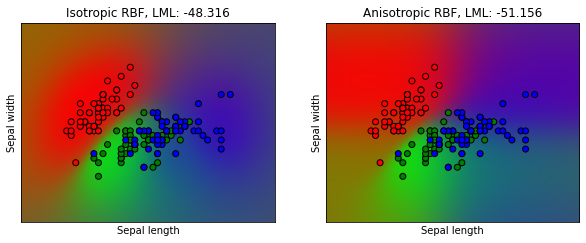

In [157]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))
for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    # Plot probabilitas yang diprediksi. Untuk itu, kami akan menetapkan warna untuk
    # untuk setiap titik di mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(1, 2, i + 1)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    # Masukkan hasilnya ke dalam plot warna
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    # Plot juga poin train
    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y], edgecolors=(0, 0, 0))
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(
        "%s, LML: %.3f" % (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta))
    )

# Tugas 4 | Naive Bayes Classification

### Konsep Dasar

Algoritma ini bekerja berdasarkan prinsip probabilitas bersyarat, seperti yang diberikan oleh Teorema Bayes. 

Teorema Bayes menemukan probabilitas atau kemungkinan suatu peristiwa akan terjadi dengan memberikan probabilitas peristiwa lain yang telah terjadi. 

Dalam istilah yang lebih sederhana, Teorema Bayes adalah metode untuk menemukan probabilitas ketika kita mengetahui probabilitas tertentu lainnya.

Teorema Bayes dinyatakan secara matematis dalam persamaan berikut:

$$ P(A|B) = {P(B|A)P(A)}/{P(B)} $$

### Implementasi Kode Python

Import library pendukung.

In [151]:
import pandas as pd

Mengambil informasi yang ada pada dataset csv.

In [158]:
Data_Iris = pd.read_csv("https://raw.githubusercontent.com/ApoorvRusia/Naive-Bayes-classification-on-Iris-dataset/master/iris.csv")

Menampilkan dataset.

In [159]:
Data_Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Mengambil library sklearn agar dapat menggunakan fungsi/methodnya.

In [160]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

In [161]:
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

Menentukan nilai variabel terikat dan variabel bebasnya.

In [162]:
X=Data_Iris.iloc[:,0:4].values
y=Data_Iris.iloc[:,4].values

Mengetahui jumlah variabel y dan x dari masing-masing kolom serta barisnya.

In [164]:
y.shape

(150,)

In [165]:
X.shape

(150, 4)

Mengambil library sklearn untuk memproses label encoder yang akan dimasukkan ke dalam array.

In [166]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [167]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Melakukan pertukaran train dan test.

In [168]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [169]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000



# Tugas 5 | *K-Means Clustering* Data Bunga Iris


### Implementasi pada Kode Python

Import library penting yang dibutuhkan.

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler

Mengambil informasi data file CSV (Iris.csv)

In [83]:
Data_Iris = pd.read_csv("https://raw.githubusercontent.com/ApoorvRusia/Naive-Bayes-classification-on-Iris-dataset/master/iris.csv")

Menampikan/membaca dataset Iris.

In [84]:
Data_Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Mengetahui jumlah baris dan kolom yang ada pada dataframe tersebut.

In [85]:
Data_Iris.shape

(150, 5)

Melakukan normalisasi nilai Min-Max.

In [86]:
scaler = MinMaxScaler()

Mentransformasikan data dari 2 kolom (Panjang Sepal dan Lebar Sepal). Kemudian, menampilkannya ke dalam dataframe dengan mengambil baris 5 teratas.

In [87]:
scale = scaler.fit_transform(Data_Iris[['sepal_length','sepal_width']]);
iris_scale = pd.DataFrame(scale, columns = ['Sepal Length','Sepal Width']);
iris_scale.head(5)

,Sepal Length,Sepal Width
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


Memetakan data ke dalam 5 *cluster*.

In [88]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(Data_Iris[['sepal_length','sepal_width']])
y_predicted

array([2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 1, 1, 1, 3, 1, 3, 1, 0, 1, 0, 0, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 1, 3, 4, 1, 1, 4, 0, 4, 1, 4,
       1, 1, 1, 3, 3, 1, 1, 4, 4, 3, 1, 3, 4, 1, 1, 4, 3, 3, 1, 4, 4, 4,
       1, 1, 3, 4, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3], dtype=int32)

Menentukan nilai center/pusat dari 5 cluster yang sudah ditentukan sebelumnya.

In [89]:
km.cluster_centers_

array([[4.77586207, 2.97241379],
       [6.54615385, 3.04615385],
       [5.25555556, 3.67037037],
       [5.83953488, 2.70930233],
       [7.475     , 3.125     ]])

# Tugas 6 | Descession Tree

### Konsep Dasar

Decision tree adalah algoritma machine learning yang menggunakan seperangkat aturan untuk membuat keputusan dengan struktur seperti pohon yang memodelkan kemungkinan hasil, biaya sumber daya, utilitas dan kemungkinan konsekuensi atau resiko. Konsepnya adalah dengan cara menyajikan algoritma dengan pernyataan bersyarat, yang meliputi cabang untuk mewakili langkah-langkah pengambilan keputusan yang dapat mengarah pada hasil yang menguntungkan. 

#### Implementasi Library

Import library.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn import tree

Mengambil informasi dataset csv.

In [3]:
Data_Iris = pd.read_csv("https://raw.githubusercontent.com/ApoorvRusia/Naive-Bayes-classification-on-Iris-dataset/master/iris.csv")

Menampilkan dataset bunga iris 10 baris teratas.

In [4]:
Data_Iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Mengambil nilai y sebagai variabel bebas yang akan menentukan jenis kelompoknya.

In [8]:
y = Data_Iris["species"]
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

Mengambil nilai x sebagai variabel terikat yang berpengaruh ke kelas klasifikasinya.

In [10]:
x = Data_Iris.drop(columns=["species"])
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Train dengan menggunakan fungsi decision tree.

In [11]:
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

Menampilkan pohon percabangan.

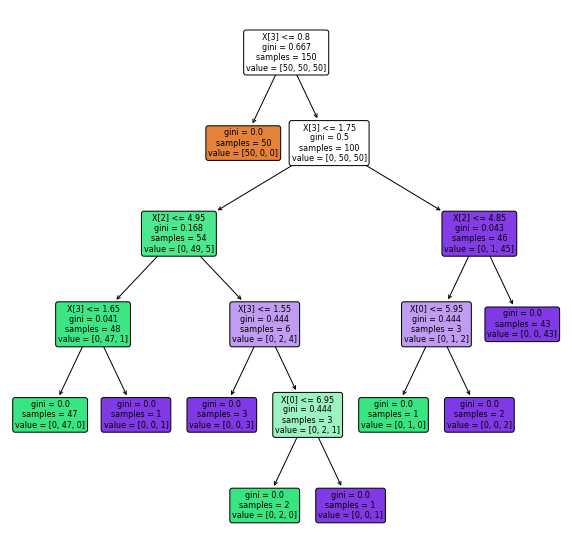

In [12]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()

#Ulangan Tengah Semester (UTS)

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi.

1.   Metode Naive Bayes Classifier
2.   Metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

### **Metode Naive Bayes Classifier**

Import library penting yang dibutuhkan.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler

Mengambil informasi data pada file CSV (dataR2.csv)

In [ ]:
Data = pd.read_csv("https://raw.githubusercontent.com/astnrhy30/datamining/main/dataR2.csv")

Menampilkan/membaca dataset.

In [ ]:
Data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


Lakukan konversi pengkategorian variabel (tipe data string/nominal) untuk variabel lanjutan.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #Inisialisasi fungsi
Age_le=le.fit_transform(Data.Age)
BMI_le = le.fit_transform(Data.BMI)
Glucose_le = le.fit_transform(Data.Glucose)
HOMA_le = le.fit_transform(Data.HOMA)
Resistin_le = le.fit_transform(Data.Resistin)
Insulin_le = le.fit_transform(Data.Insulin)
Leptin_le = le.fit_transform(Data.Leptin)
Adiponectin_le = le.fit_transform(Data.Adiponectin)
MCP1_le = le.fit_transform(Data.MCP1)

Data["Age_le"]=Age_le
Data["BMI_le"]=BMI_le
Data["Glucose_le"]=Glucose_le
Data["HOMA_le"]=HOMA_le
Data["Resistin_le"]=Resistin_le
Data["Insulin_le"]=Insulin_le
Data["Leptin_le"]=Leptin_le
Data["Adiponectin_le"]=Adiponectin_le
Data["MCP1_le"]=MCP1_le

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification,Age_le,BMI_le,Glucose_le,HOMA_le,Resistin_le,Insulin_le,Leptin_le,Adiponectin_le,MCP1_le
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,17,33,1,0,37,3,14,68,53
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,47,5,19,13,4,9,15,26,57
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,46,30,18,34,45,33,50,108,67
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,35,14,5,7,66,11,21,41,104
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,49,11,19,23,56,19,4,20,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2,14,50,19,18,58,12,106,87,27
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2,30,49,27,43,33,34,30,105,38
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2,32,89,24,56,53,51,108,109,35
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2,38,41,9,4,1,5,68,112,48


Drop kolom dengan tipe data kategorikal dari dataframe.

In [ ]:
Data = Data.drop(["Age", "BMI", "Glucose", "Insulin", "HOMA", "Leptin", "Adiponectin", "Resistin", "MCP1", "Classification"], axis=1)
Data

,Age_le,BMI_le,Glucose_le,HOMA_le,Resistin_le,Insulin_le,Leptin_le,Adiponectin_le,MCP1_le
0,17,33,1,0,37,3,14,68,53
1,47,5,19,13,4,9,15,26,57
2,46,30,18,34,45,33,50,108,67
3,35,14,5,7,66,11,21,41,104
4,49,11,19,23,56,19,4,20,93
...,...,...,...,...,...,...,...,...,...
111,14,50,19,18,58,12,106,87,27
112,30,49,27,43,33,34,30,105,38
113,32,89,24,56,53,51,108,109,35
114,38,41,9,4,1,5,68,112,48



Menetapkan x (variabel bebas).

In [ ]:
x = Data.iloc[:, 0:3]
x.head(10)

,Age_le,BMI_le,Glucose_le
0,17,33,1
1,47,5,19
2,46,30,18
3,35,14,5
4,49,11,19
5,18,25,19
6,50,23,5
7,42,35,39
8,39,17,24
9,41,28,10


Menetapkan y (variabel bebas).

In [ ]:
y = Data.iloc[:, 8:]
y.head(10)

,MCP1_le
0,53
1,57
2,67
3,104
4,93
5,64
6,111
7,30
8,5
9,36


Pisahkan data menjadi train dat test spilt.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

Model bangunan dengan Sklearn.

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB() #Inisialisasi fungsi
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

Akurasi Skor.

In [ ]:
y_predict=model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict, normalize=True)

0.0

Mari kita prediksi suatu data termasuk ke dalam kelas apa dengan (ya atau tidak) pada pilihan kelas 1,2.

In [ ]:
model.predict([[20, 25, 39]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([112])

### **Metode pohon keputusan (Decision tree)**

Import/ambil library untuk membangun Decision Tree pada Python.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn import tree

Tampilkan/baca data.

In [5]:
Data2 = pd.read_csv("https://raw.githubusercontent.com/astnrhy30/datamining/main/dataR2.csv")

Tampilkan 5 baris teratas dari dataset tersebut dengan menggunakan fungsi head().

In [6]:
Data2.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


Mengambil nilai y sebagai variabel bebas yang akan menentukan jenis kelompoknya.

In [7]:
y = Data2["Classification"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

Mengambil nilai x sebagai variabel terikat yang berpengaruh ke kelas klasifikasinya.

In [ ]:
X = Data2.drop(columns=["Classification"])
x.head()

,Age_le,BMI_le,Glucose_le
0,17,33,1
1,47,5,19
2,46,30,18
3,35,14,5
4,49,11,19


Train model tersebut dengan menggunakan decision tree klasifikasi.

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

Menampilkan pohon percabangan

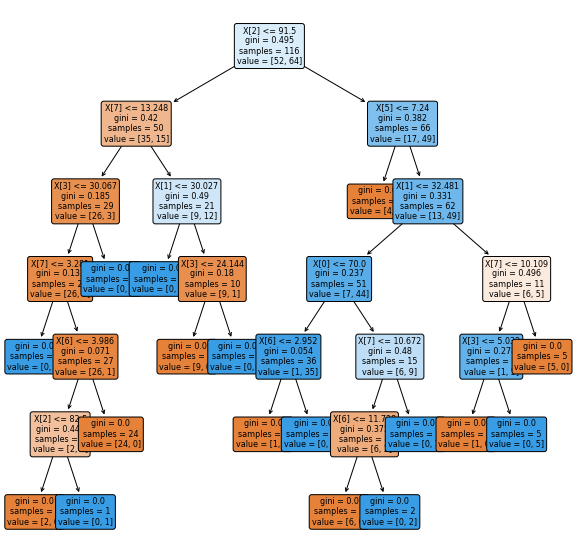

In [ ]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()